In [1]:
import numpy as np

In [2]:
def create_table_and_variables(a, b, f):
    number_of_variables = len(a[0])
    number_of_restrictions = len(b)
    basis_indexes = np.arange(number_of_variables, number_of_variables + number_of_restrictions)

    table = []
    new = np.zeros(number_of_restrictions)
    for i in range(number_of_restrictions):
        t = new.copy()
        t[i] = 1
        table.append([b[i]] + a[i] + t.tolist())
    table.append([0] + (-np.array(f)).tolist() + [0] * number_of_restrictions)
    table.append([0] * (number_of_variables + 1) + [1] * number_of_restrictions)
    table  = np.array(table)
    for i in range(number_of_restrictions):
        table[-1] -= table[i]
    return table, number_of_variables, number_of_restrictions, basis_indexes


def get_basic_plan(table, number_of_variables, number_of_restrictions, basis_indexes):
    basic_plan = [0] * (number_of_variables + number_of_restrictions)
    for i, j in zip(basis_indexes, range(number_of_restrictions)):
        basic_plan[i] = table[j, 0]
    return basic_plan


def is_optimal_solution(table, number_of_variables):
    return (table[-1][1 : number_of_variables + 1] >= 0).all() and (table[-2][1 : number_of_variables + 1] >= 0).all()


def get_permutations(table, number_of_variables, number_of_restrictions):
    k = -2
    if (table[-1] >= 0).all():
        k = -3
    in_idx = np.argmin(table[k + 1, 1:number_of_variables + 1])
    mask = table[:number_of_restrictions, in_idx + 1] > 0
    out_idx = np.argmin(table[:number_of_restrictions, 0][mask] / table[:number_of_restrictions, in_idx + 1][mask])
    if (table[-1] >= 0).all() and not mask[0]:
        out_idx += len(table[:number_of_restrictions, 0]) - sum(mask)
    return in_idx, out_idx


def recalculation(table, in_idx, out_idx):
    leading_column = in_idx + 1
    leading_row = out_idx

    for i in range(len(table)):
        if i != leading_row:
            table[i] = table[i] - np.divide(table[i][leading_column], table[leading_row][leading_column], 
                                            out=np.zeros_like(table[leading_row][leading_column]), 
                                            where=table[leading_row][leading_column] != 0) * table[leading_row]
    table[leading_row] = table[leading_row] / table[leading_row][leading_column]
    return table


def solve(a, b, f):
    table, number_of_variables, number_of_restrictions, basis_indexes = create_table_and_variables(a, b, f)
    basic_plan = get_basic_plan(table, number_of_variables, number_of_restrictions, basis_indexes)
    print("Начальная таблица")
    print(table)
    number = 1
    while not is_optimal_solution(table, number_of_variables):
        in_idx, out_idx = get_permutations(table, number_of_variables, number_of_restrictions)
        basis_indexes[out_idx] = in_idx
        table = recalculation(table, in_idx, out_idx)
        basic_plan = get_basic_plan(table, number_of_variables, number_of_restrictions, basis_indexes)
        print("\n\nШаг ", number)
        print("Таблица")
        print(np.round(table, 3))
        print("Базисный план")
        print(np.round(basic_plan, 3))
        number += 1
    return basic_plan


def get_value(f, basic_plan):
    s = 0
    for i, j in zip(f, basic_plan):
        s += i * j
    return s

<h2>Исходные данные задачи</h2>

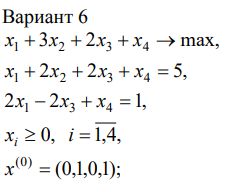

In [3]:
a = [[1, 2,  2, 1],
     [2, 0, -2, 1]]
b = [5, 1]
f = [1, 3, 2, 1]

In [4]:
basic_plan = solve(a, b, f)
print("\nЗначение целевой функции:", get_value(f, basic_plan))

Начальная таблица
[[ 5.  1.  2.  2.  1.  1.  0.]
 [ 1.  2.  0. -2.  1.  0.  1.]
 [ 0. -1. -3. -2. -1.  0.  0.]
 [-6. -3. -2.  0. -2.  0.  0.]]


Шаг  1
Таблица
[[ 4.5  0.   2.   3.   0.5  1.  -0.5]
 [ 0.5  1.   0.  -1.   0.5  0.   0.5]
 [ 0.5  0.  -3.  -3.  -0.5  0.   0.5]
 [-4.5  0.  -2.  -3.  -0.5  0.   1.5]]
Базисный план
[0.5 0.  0.  0.  4.5 0. ]


Шаг  2
Таблица
[[ 1.5    0.     0.667  1.     0.167  0.333 -0.167]
 [ 2.     1.     0.667  0.     0.667  0.333  0.333]
 [ 5.     0.    -1.     0.     0.     1.     0.   ]
 [ 0.     0.     0.     0.     0.     1.     1.   ]]
Базисный план
[2.  0.  1.5 0.  0.  0. ]


Шаг  3
Таблица
[[ 2.25  0.    1.    1.5   0.25  0.5  -0.25]
 [ 0.5   1.    0.   -1.    0.5   0.    0.5 ]
 [ 7.25  0.    0.    1.5   0.25  1.5  -0.25]
 [ 0.    0.    0.    0.    0.    1.    1.  ]]
Базисный план
[0.5  2.25 0.   0.   0.   0.  ]

Значение целевой функции: 7.25
